<a href="https://colab.research.google.com/github/zeynepdinc12/KaliforniyaEvHalki/blob/main/California_Housing_Households.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt

#Veri düzenleme için kullanılan ekler
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler                #minimum ve maksimum skaler değerleri için sklearn'den ön işleme kütüphanesini yükle
from sklearn.metrics import  mean_absolute_error, mean_squared_error         #ortalama ve ortalama kareler hatası
from keras.models import load_model                                     #kurduğumuz modeli kaydetmeyi sağlayan tensorflow frameworkü

#Tensorflow içindeki ekler
from keras.models import Sequential
from keras.layers import Dense


In [175]:
egitimVS=pd.read_csv("/content/sample_data/california_housing_train.csv")
egitimVS=pd.DataFrame(egitimVS)
egitimVS=shuffle(egitimVS)
xegitim=egitimVS[["total_rooms","total_bedrooms","population"]].values
yegitim=egitimVS["households"].values
xegitim.shape
yegitim.shape
egitimVS

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8792,-118.63,34.20,19.0,7411.0,1045.0,2814.0,950.0,6.7785,336100.0
16504,-122.64,38.48,19.0,3244.0,449.0,1174.0,454.0,5.8369,255700.0
1012,-117.10,32.76,31.0,987.0,267.0,619.0,250.0,2.9286,151800.0
11401,-121.22,37.80,13.0,335.0,89.0,247.0,77.0,1.6111,74100.0
2280,-117.43,34.07,18.0,2453.0,537.0,1503.0,500.0,2.3768,95300.0
...,...,...,...,...,...,...,...,...,...
161,-116.22,33.72,28.0,826.0,258.0,979.0,245.0,1.7172,58800.0
13988,-122.04,37.55,23.0,3170.0,532.0,1446.0,515.0,4.4357,291700.0
5927,-118.21,34.10,36.0,2000.0,533.0,1234.0,535.0,3.7437,241700.0
2291,-117.44,34.45,6.0,6068.0,1137.0,3094.0,947.0,3.5167,130900.0


In [174]:
testVS=pd.read_csv("/content/sample_data/california_housing_test.csv")
testVS=pd.DataFrame(testVS)
testVS=shuffle(testVS)
xtest=testVS[["total_rooms","total_bedrooms","population"]].values
ytest=testVS["households"].values
xtest.shape
ytest.shape
testVS.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [176]:
skaler=MinMaxScaler()
skaler.fit(xegitim)
skaler.fit(xtest)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [177]:
xegitim=skaler.transform(xegitim)
xtest=skaler.transform(xtest)

In [186]:
model=Sequential()
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse") 
model.fit(xegitim,yegitim,epochs=260)

Epoch 1/260
532/532 [==============================] - 1s 1ms/step - loss: 411837.6470
Epoch 2/260
532/532 [==============================] - 1s 1ms/step - loss: 362593.3338
Epoch 3/260
532/532 [==============================] - 1s 1ms/step - loss: 136381.5497
Epoch 4/260
532/532 [==============================] - 1s 1ms/step - loss: 72444.5824
Epoch 5/260
532/532 [==============================] - 1s 1ms/step - loss: 15993.4599
Epoch 6/260
532/532 [==============================] - 1s 1ms/step - loss: 9177.6330
Epoch 7/260
532/532 [==============================] - 1s 1ms/step - loss: 7600.0012
Epoch 8/260
532/532 [==============================] - 1s 1ms/step - loss: 8176.3985
Epoch 9/260
532/532 [==============================] - 1s 1ms/step - loss: 7153.0947
Epoch 10/260
532/532 [==============================] - 1s 1ms/step - loss: 6665.4037
Epoch 11/260
532/532 [==============================] - 1s 1ms/step - loss: 6189.8645
Epoch 12/260
532/532 [==============================] -

In [187]:
kayip=model.history.history["loss"]
kayip

[394664.34375,
 312712.78125,
 111291.0,
 55287.375,
 12079.0703125,
 8560.486328125,
 8004.56201171875,
 7578.65185546875,
 7169.830078125,
 6801.60302734375,
 6507.5693359375,
 6248.380859375,
 5986.9296875,
 5766.49658203125,
 5586.44775390625,
 5395.73193359375,
 5234.66357421875,
 5116.47998046875,
 4992.119140625,
 4872.517578125,
 4767.7880859375,
 4680.51953125,
 4640.05078125,
 4571.78955078125,
 4514.41748046875,
 4484.078125,
 4462.5908203125,
 4426.7724609375,
 4396.6669921875,
 4393.048828125,
 4368.35400390625,
 4350.10205078125,
 4326.4169921875,
 4329.83251953125,
 4333.1259765625,
 4338.884765625,
 4336.24267578125,
 4298.17529296875,
 4325.1005859375,
 4316.9931640625,
 4322.1123046875,
 4317.318359375,
 4307.16015625,
 4331.0869140625,
 4293.70654296875,
 4311.07958984375,
 4304.01806640625,
 4317.44580078125,
 4292.8994140625,
 4306.09326171875,
 4302.7861328125,
 4313.28076171875,
 4298.35693359375,
 4321.61865234375,
 4315.671875,
 4308.55224609375,
 4309.33496093

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


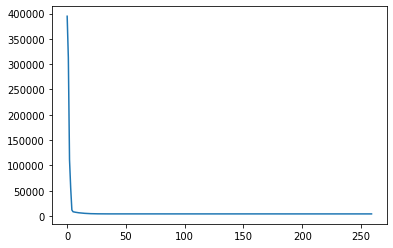

In [188]:
sb.lineplot(range(len(kayip)),kayip)

In [189]:
egitimKaybi=model.evaluate(xegitim,yegitim,verbose=1)
testKaybi=model.evaluate(xtest,ytest,verbose=1)
tahminler=model.predict(xtest)
tahminler

94/94 [==============================] - 0s 808us/step - loss: 5900.1016


array([[1229.5756 ],
       [ 454.5876 ],
       [ 718.00415],
       ...,
       [ 254.99512],
       [1050.4297 ],
       [ 464.80667]], dtype=float32)

In [190]:
gercekdf=pd.DataFrame(ytest,columns=["Gerçek Test"])
gercekdf

,Gerçek Test
0,1226.0
1,468.0
2,779.0
3,176.0
4,514.0
...,...
2995,150.0
2996,488.0
2997,258.0
2998,940.0


In [191]:
tahminler=pd.Series(tahminler.reshape(3000,))
tahminler

0       1229.575562
1        454.587585
2        718.004150
3        165.306152
4        533.041565
           ...     
2995     150.038956
2996     462.471313
2997     254.995117
2998    1050.429688
2999     464.806671
Length: 3000, dtype: float32

In [192]:
tahminler=pd.concat([tahminler,gercekdf],axis=1)
tahminler.columns=["Tahminler","Gerçekler"]
tahminler

,Tahminler,Gerçekler
0,1229.575562,1226.0
1,454.587585,468.0
2,718.004150,779.0
3,165.306152,176.0
4,533.041565,514.0
...,...,...
2995,150.038956,150.0
2996,462.471313,488.0
2997,254.995117,258.0
2998,1050.429688,940.0


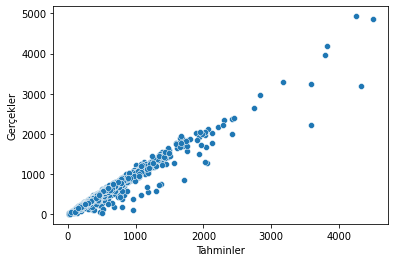

In [193]:
sb.scatterplot(x="Tahminler",y="Gerçekler",data=tahminler)

In [194]:
model.save("california_housing_model.h5")